## SBP-SAT scheme for numerical solutions to the 2D linearised shallow water equations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import math
## initialise parameters: domain, coefficients etc 
lx=10; ly=10   ## domain length
nx=201; ny=201
u0= 2; v0=0; g=9.8;H=1 

In [2]:
## utilities 


## decimal range step value function 
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step


In [37]:
## 2D SBP operators 
def dy2d( u, ny, dy, order):
    # summation-by-parts finite difference operators for first derivatives du/dx
    uy=u*0     ##initiate partial derivitive vector 
    m = ny-1
    
    # second order accurate case
    if order==2:
        # calculate partial derivatives on the boundaries:[0, m] with one-sided difference operators

        
        uy[0,:] = (u[1, :] -  u[0,:])/dy

        
        uy[m,:] = (u[m,:] -  u[m-1,:])/dy
        
        #calculate partial derivatives in the interior:(1:nx-1)
#         for i in range(1,m):
#             uy[i,:] = (u[i+1, :] -  u[i-1, :])/(2.0*dy)
        uy[1:m, :] = (u[2:(m+1), :] -  u[:(m-1), :])/(2.0*dy)
    if order==4:
        ################################################# 
        # calculate partial derivatives on the boundaries:(0,1,2,3, : m-3, m-2, m-1, m)
        # with one-sided difference operators

        
        uy[0,:] = -24./17*u[0,:] + 59./34*u[1, :]  - 4./17*u[2, :] - 3./34*u[3,:]

        
        uy[1,:] = -1./2*u[0,:] + 1./2*u[2, :]

        
        uy[2,:] = 4./43*u[0,:] - 59./86*u[1, :]  + 59./86*u[3, :] - 4./43*u[4,:]

            
        uy[3,:] = 3./98*u[0,:] - 59./98*u[2, :]  + 32./49*u[4,:] - 4./49*u[5,:]
         

        
        uy[m,:] = 24./17*u[m,:] - 59./34*u[m-1, :]  + 4./17*u[m-2, :] + 3./34*u[m-3,:]

        
        uy[m-1,:] = 1./2*u[m,:] - 1./2*u[m-2, :]

        
        uy[m-2,:] = -4./43*u[m,:] + 59./86*u[m-1, :]- 59./86*u[m-3, :]+ 4./43*u[m-4,:]

        
        uy[m-3,:] = -3./98*u[m,:] + 59./98*u[m-2,:]- 32./49*u[m-4, :]+ 4./49*u[m-5,:]
    
          
        #------------------------------------------------------------------------------------------------------------------------------
        uy[3:m-3,:] = 0.083333333333333*u[1:m-5,:] - 0.666666666666667*u[2:m-4,:] + 0.666666666666667*u[4:m-2,:] - 0.083333333333333*u[5:m-1,:]


#         for i in range(3,m-3):
#             uy[i,:] = 0.083333333333333*u[i-2,:] - 0.666666666666667*u[i-1,:] + 0.666666666666667*u[i+1,:] - 0.083333333333333*u[i+2,:]

        uy = uy/dy
    if order == 6:
        
        uy[0,:] = -1.694834962162858*u[0,:] + 2.245634824947698*u[1,:] - 0.055649692295628*u[2,:] - 0.670383570370653*u[3,:]\
                    - 0.188774952148393*u[4,:] + 0.552135032829910*u[5,:] - 0.188126680800077*u[6,:]
            
       
        uy[1,:] = -0.434411786832708*u[0,:] + 0.107043134706685*u[2,:] + 0.420172642668695*u[3,:] + 0.119957288069806*u[4,:]\
                      - 0.328691543801578*u[5,:] + 0.122487487014485*u[6,:] - 0.006557221825386*u[7,:]

        
        uy[2,:] = 0.063307644169533*u[0,:] - 0.629491308812471*u[1,:] + 0.809935419586724*u[3,:] - 0.699016381364484*u[4,:]\
                    + 0.850345731199969*u[5,:] - 0.509589652965290*u[6,:] + 0.114508548186019*u[7,:]

        
        uy[3,:] = 0.110198643174386*u[0,:] - 0.357041083340051*u[1,:] - 0.117033418681039*u[2,:] + 0.120870009174558*u[4,:]\
                    + 0.349168902725368*u[5,:] - 0.104924741749615*u[6,:] - 0.001238311303608*u[7,:]

        
        uy[4,:] = 0.133544619364965*u[0,:] - 0.438678347579289*u[1,:] + 0.434686341173840*u[2,:] - 0.520172867814934*u[3,:]\
                    + 0.049912002176267*u[5,:] + 0.504693510958978*u[6,:] - 0.163985258279827*u[7,:]

        
        uy[5,:] = -0.127754693486067*u[0,:] + 0.393149407857401*u[1,:] - 0.172955234680916*u[2,:] - 0.491489487857764*u[3,:]\
                    - 0.016325050231672*u[4,:] + 0.428167552785852*u[6,:] - 0.025864364383975*u[7,:] + 0.013071869997141*u[8,:]

        
        uy[6,:] = 0.060008241515128*u[0,:] - 0.201971348965594*u[1,:] + 0.142885356631256*u[2,:] + 0.203603636754774*u[3,:]\
                    - 0.227565385120003*u[4,:] - 0.590259111130048*u[5,:] + 0.757462553894374*u[7,:] - 0.162184436527372*u[8,:]\
                    + 0.018020492947486*u[9,:]
        
        
        uy[7,:] = 0.009910488565285*u[1,:] - 0.029429452176588*u[2,:] + 0.002202493355677*u[3,:] + 0.067773581604826*u[4,:]\
                      + 0.032681945726690*u[5,:] - 0.694285851935105*u[6,:] + 0.743286642396343*u[8,:] - 0.148657328479269*u[9,:]\
                      + 0.016517480942141*u[10,:]

        
        uy[m-7,:] =-0.016517480942141*u[m-10,:] + 0.148657328479269*u[m-9,:] - 0.743286642396343*u[m-8,:] + 0.694285851935105*u[m-6,:]\
                - 0.032681945726690*u[m-5,:] - 0.067773581604826*u[m-4,:] - 0.002202493355677*u[m-3,:] + 0.029429452176588*u[m-2,:]\
                - 0.009910488565285*u[m-1,:]

        
        uy[m-6,:] =-0.018020492947486*u[m-9,:] + 0.162184436527372*u[m-8,:] - 0.757462553894374*u[m-7,:] + 0.590259111130048*u[m-5,:]\
                + 0.227565385120003*u[m-4,:] - 0.203603636754774*u[m-3,:] - 0.142885356631256*u[m-2,:] + 0.201971348965594*u[m-1,:]\
                - 0.060008241515128*u[m,:]

       
        uy[m-5,:] =-0.013071869997141*u[m-8,:] + 0.025864364383975*u[m-7,:] - 0.428167552785852*u[m-6,:] + 0.016325050231672*u[m-4,:]\
                + 0.491489487857764*u[m-3,:] + 0.172955234680916*u[m-2,:] - 0.393149407857401*u[m-1,:] + 0.127754693486067*u[m,:]

        
        uy[m-4,:] = 0.163985258279827*u[m-7,:] - 0.504693510958978*u[m-6,:] - 0.049912002176267*u[m-5,:] + 0.520172867814934*u[m-3,:]\
                    - 0.434686341173840*u[m-2,:] + 0.438678347579289*u[m-1,:] - 0.133544619364965*u[m,:]

        
        uy[m-3,:] = 0.001238311303608*u[m-7,:] + 0.104924741749615*u[m-6,:] - 0.349168902725368*u[m-5,:] - 0.120870009174558*u[m-4,:]\
                    + 0.117033418681039*u[m-2,:] + 0.357041083340051*u[m-1,:] - 0.110198643174386*u[m,:]

        
        uy[m-2,:] =-0.114508548186019*u[m-7,:] + 0.509589652965290*u[m-6,:] - 0.850345731199969*u[m-5,:] + 0.699016381364484*u[m-4,:]\
                - 0.809935419586724*u[m-3,:] + 0.629491308812471*u[m-1,:] - 0.063307644169533*u[m,:]

        
        uy[m-1,:] = 0.006557221825386*u[m-7,:] - 0.122487487014485*u[m-6,:] + 0.328691543801578*u[m-5,:] - 0.119957288069806*u[m-4,:]\
                    - 0.420172642668695*u[m-3,:] - 0.107043134706685*u[m-2,:] + 0.434411786832708*u[m,:]
                
        

        
        uy[m,:]   = 0.188126680800077*u[m-6,:] - 0.552135032829910*u[m-5,:] + 0.188774952148393*u[m-4,:] + 0.670383570370653*u[m-3,:]\
                      + 0.055649692295628*u[m-2,:] - 2.245634824947698*u[m-1,:] + 1.694834962162858*u[m,:]
                
      
        
        uy[7:m-7,:] = -0.016666666666667*u[4:m-10,:] + 0.15*u[5:m-9,:] - 0.75*u[6:m-8,:] + 0.75*u[8:m-6,:] - 0.15*u[9:m-5,:] + 0.016666666666667*u[10:m-4,:]
#         for i in range(7,m-7):
#             uy[i,:] = -0.016666666666667*u[i-3,:] + 0.15*u[i-2,:] - 0.75*u[i-1,:] + 0.75*u[i+1,:] - 0.15*u[i+2,:] + 0.016666666666667*u[i+3,:]
    
        uy[:] = uy[:]/dy
    return uy 
def dx2d( u, nx, dx, order):
    # summation-by-parts finite difference operators for first derivatives du/dy
    ux=0*u
    m = nx-1


    if order == 2:

    
       ux[:,0]= u[:,1]-u[:,0]

            
       ux[:,m] = u[:,m]-u[:,m-1]
       ux[:, 1:m] = 0.5*(u[:, 2:(m+1)] - u[:, 0:(m-1)])
        
#        for j in range(1,m):
      
#             ux[:,j] = 0.5*(u[:, j+1] - u[:, j-1])
   
       ux= ux/dx
    if order == 4:
        
        
        ux[:,0] = -24.0/17.0*u[:,0] + 59.0/34.0*u[:,1]  - 4.0/17.0*u[:, 2] - 3.0/34.0*u[:, 3]
            
        
        ux[:,1] = -1.0/2.0*u[:,0] + 1.0/2.0*u[:,2]

        
        ux[:,2] = 4.0/43.0*u[:,0] - 59.0/86.0*u[:,1]  + 59.0/86.0*u[:,3] - 4.0/43.0*u[:,4]

        
        ux[:,3] = 3.0/98.0*u[:,0] - 59.0/98.0*u[:,2]  + 32.0/49.0*u[:,4] - 4.0/49.0*u[:,5]

        
        ux[:,m] = 24.0/17.0*u[:,m] - 59.0/34.0*u[:,m-1]  + 4.0/17.0*u[:,m-2] + 3.0/34.0*u[:,m-3]

            
        ux[:,m-1] = 1.0/2.0*u[:,m] - 1.0/2.0*u[:,m-2]

            
        ux[:,m-2] = -4.0/43.0*u[:,m] + 59.0/86.0*u[:,m-1]  - 59.0/86.0*u[:,m-3] + 4.0/43.0*u[:,m-4]

            
        ux[:,m-3] = -3.0/98.0*u[:,m] + 59.0/98.0*u[:,m-2]  - 32.0/49.0*u[:,m-4] + 4.0/49.0*u[:,m-5]
        ux[:,3:m-3] = 1.0/12.0*u[:,1:m-5] - 2.0/3.0*u[:,2:m-4]  + 2.0/3.0*u[:,4:m-2] - 1.0/12.0*u[:,5:m-1]
#         for j in range(3,m-3):
#             ux[:,j] = 1.0/12.0*u[:,j-2] - 2.0/3.0*u[:,j-1]  + 2.0/3.0*u[:,j+1] - 1.0/12.0*u[:,j+2]
    

        ux = ux/dx
    if order == 6: 
           ## calcutate partials on boundary 
        
            
        ux[:,0] = -1.694834962162858*u[:,0] + 2.245634824947698*u[:,1] - 0.055649692295628*u[:,2] - 0.670383570370653*u[:,3]\
                    - 0.188774952148393*u[:,4] + 0.552135032829910*u[:,5] - 0.188126680800077*u[:,6]

       
        ux[:,1] = -0.434411786832708*u[:,0] + 0.107043134706685*u[:,2] + 0.420172642668695*u[:,3] + 0.119957288069806*u[:,4]\
                    - 0.328691543801578*u[:,5] + 0.122487487014485*u[:,6] - 0.006557221825386*u[:,7]

        
        ux[:,2] = 0.063307644169533*u[:,0] - 0.629491308812471*u[:,1] + 0.809935419586724*u[:,3] - 0.699016381364484*u[:,4]\
                + 0.850345731199969*u[:,5] - 0.509589652965290*u[:,6] + 0.114508548186019*u[:,7]
        
        
        ux[:,3] = 0.110198643174386*u[:,0] - 0.357041083340051*u[:,1] - 0.117033418681039*u[:,2] + 0.120870009174558*u[:,4]\
                    + 0.349168902725368*u[:,5] - 0.104924741749615*u[:,6] - 0.001238311303608*u[:,7]

        
        ux[:,4] = 0.133544619364965*u[:,0] - 0.438678347579289*u[:,1] + 0.434686341173840*u[:,2] - 0.520172867814934*u[:,3]\
                    + 0.049912002176267*u[:,5] + 0.504693510958978*u[:,6] - 0.163985258279827*u[:,7]

       
        ux[:,5] = -0.127754693486067*u[:,0] + 0.393149407857401*u[:,1] - 0.172955234680916*u[:,2] - 0.491489487857764*u[:,3]\
                      - 0.016325050231672*u[:,4] + 0.428167552785852*u[:,6] - 0.025864364383975*u[:,7] + 0.013071869997141*u[:,8]

        
        ux[:,6] = 0.060008241515128*u[:,0] - 0.201971348965594*u[:,1] + 0.142885356631256*u[:,2] + 0.203603636754774*u[:,3]\
                      - 0.227565385120003*u[:,4] - 0.590259111130048*u[:,5] + 0.757462553894374*u[:,7] - 0.162184436527372*u[:,8]\
                      + 0.018020492947486*u[:,9]

        
        ux[:,7] = 0.009910488565285*u[:,1] - 0.029429452176588*u[:,2] + 0.002202493355677*u[:,3] + 0.067773581604826*u[:,4]\
                      + 0.032681945726690*u[:,5] - 0.694285851935105*u[:,6] + 0.743286642396343*u[:,8] - 0.148657328479269*u[:,9]\
                      + 0.016517480942141*u[:,10]

        
        ux[:,m-7] =-0.016517480942141*u[:,m-10] + 0.148657328479269*u[:,m-9] - 0.743286642396343*u[:,m-8] + 0.694285851935105*u[:,m-6]\
                - 0.032681945726690*u[:,m-5] - 0.067773581604826*u[:,m-4] - 0.002202493355677*u[:,m-3] + 0.029429452176588*u[:,m-2]\
                - 0.009910488565285*u[:,m-1]

       
        ux[:,m-6] =-0.018020492947486*u[:,m-9] + 0.162184436527372*u[:,m-8] - 0.757462553894374*u[:,m-7] + 0.590259111130048*u[:,m-5]\
                + 0.227565385120003*u[:,m-4] - 0.203603636754774*u[:,m-3] - 0.142885356631256*u[:,m-2] + 0.201971348965594*u[:,m-1]\
                - 0.060008241515128*u[:,m]

        
        ux[:,m-5] =-0.013071869997141*u[:,m-8] + 0.025864364383975*u[:,m-7] - 0.428167552785852*u[:,m-6] + 0.016325050231672*u[:,m-4]\
            + 0.491489487857764*u[:,m-3] + 0.172955234680916*u[:,m-2] - 0.393149407857401*u[:,m-1] + 0.127754693486067*u[:,m]

        
        ux[:,m-4] = 0.163985258279827*u[:,m-7] - 0.504693510958978*u[:,m-6] - 0.049912002176267*u[:,m-5] + 0.520172867814934*u[:,m-3]\
                          - 0.434686341173840*u[:,m-2] + 0.438678347579289*u[:,m-1] - 0.133544619364965*u[:,m]

       
        ux[:,m-3] = 0.001238311303608*u[:,m-7] + 0.104924741749615*u[:,m-6] - 0.349168902725368*u[:,m-5] - 0.120870009174558*u[:,m-4]\
                          + 0.117033418681039*u[:,m-2] + 0.357041083340051*u[:,m-1] - 0.110198643174386*u[:,m]

        
        ux[:,m-2] =-0.114508548186019*u[:,m-7] + 0.509589652965290*u[:,m-6] - 0.850345731199969*u[:,m-5] + 0.699016381364484*u[:,m-4]\
                - 0.809935419586724*u[:,m-3] + 0.629491308812471*u[:,m-1] - 0.063307644169533*u[:,m]

        
        ux[:,m-1] = 0.006557221825386*u[:,m-7] - 0.122487487014485*u[:,m-6] + 0.328691543801578*u[:,m-5] - 0.119957288069806*u[:,m-4]\
                    - 0.420172642668695*u[:,m-3] - 0.107043134706685*u[:,m-2] + 0.434411786832708*u[:,m]
        
        
        ux[:,m]   = 0.188126680800077*u[:,m-6] - 0.552135032829910*u[:,m-5] + 0.188774952148393*u[:,m-4] + 0.670383570370653*u[:,m-3]\
                    + 0.055649692295628*u[:,m-2] - 2.245634824947698*u[:,m-1] + 1.694834962162858*u[:,m]
                       
#         for j in range(7,m-7):
#             ux[:,j] = -0.016666666666666667*u[:,j-3] + 0.15*u[:,j-2] - 0.75*u[:,j-1] + 0.75*u[:,j+1] - 0.15*u[:,j+2]\
#             + 0.01666666666666667*u[:,j+3]
        ux[:,7:m-7] = -0.016666666666666667*u[:,4:m-10] + 0.15*u[:,5:m-9] - 0.75*u[:,6:m-8] + 0.75*u[:,8:m-6] - 0.15*u[:,9:m-5]\
            + 0.01666666666666667*u[:,10:m-4]
            
    
        ux = ux/dx

        
    
    return ux

In [4]:
## define exact manufactured solutions 
def uM(x,y,t): 
    um = np.cos(2*math.pi*t)*np.sin(5*math.pi*x +2.5)*np.sin(5*math.pi*y+2.5)
    return um 

def vM(x,y,t):
    vm = -uM(x,y,t)
    return vm 

def hM(x,y,t):
    hm= 1 + 0.2*np.sin(2*math.pi*t)*np.cos(5*math.pi*x)*np.cos(5*math.pi*y)
    return hm

## define forcing functions for manufactured system 
def FU(x,y,t,u0,H,g):
    pi = math.pi 
    F = -2*pi*np.sin(2*pi*t)*np.sin(5*pi*x +2.5)*np.sin(5*pi*y+2.5)\
        +u0*5*pi*np.cos(2*pi*t)*np.cos(5*pi*x+ 2.5)*np.sin(5*pi*y+2.5)\
        -g*5*pi*0.2*np.sin(2*pi*t)*np.sin(5*pi*x)*np.cos(5*pi*y)
    return F 

def FV(x,y,t,u0,H,g): 
    pi = math.pi 
    F = 2*pi*np.sin(2*pi*t)*np.sin(5*pi*x +2.5)*np.sin(5*pi*y+2.5)\
        -u0*5*pi*np.cos(2*pi*t)*np.cos(5*pi*x+ 2.5)*np.sin(5*pi*y+2.5)\
        -g*5*pi*0.2*np.sin(2*pi*t)*np.cos(5*pi*x)*np.sin(5*pi*y)
    return F

def FH(x,y,t,u0,H,g): 
    pi= math.pi 
    F = 0.2*2*pi*np.cos(2*pi*t)*np.cos(5*pi*x)*np.cos(5*pi*y)\
        -u0*0.2*5*pi*np.sin(2*pi*t)*np.sin(5*pi*x)*np.cos(5*pi*y)\
        +H*5*pi*np.cos(2*pi*t)*np.cos(5*pi*x+ 2.5)*np.sin(5*pi*y+2.5)\
        -H*5*pi*np.cos(2*pi*t)*np.sin(5*pi*x+ 2.5)*np.cos(5*pi*y+2.5)
    return F 
        

In [5]:
##RHS of system: could be written in a single array, but for now i will write explicitly (easier to follow for me)
def rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t): 
    ## store fields so they dont have to be called multiple times 
    dudx= dx2d( u, nx, dx, order)
    dvdy= dy2d( v, ny, dy, order)
    dhdy= dy2d( h, ny, dy, order)
    dhdx= dx2d( h, nx, dx, order)
    ## rates from PDE
    ur= -(u0*dudx+g*dhdx) -(v0*dy2d( u, ny, dy, order))
    
    vr= -(u0*dx2d( v, nx, dx, order)) -(v0*dvdy +g*dhdy)
    
    hr= -(u0*dhdx +H*dudx) - (H*dvdy+v0*dhdy)
   
    # quadrature weights (note: dx=dy for our problem, but not always the case)
    if order==2:
        hx = 0.5*dx
        hy = 0.5*dy
        
    if order== 4:
        hx = (17.0/48.0)*dx
        hy = (17.0/48.0)*dy

    if order==6:
        hx = 13649.0/43200.0*dx
        hy = 13649.0/43200.0*dy
    
    
    #penalty weights  
    Z= math.sqrt(g*H)
    F= math.sqrt(g/H)
    t1=Z/(hx*2); t2=Z/hx; t3=u0/(hx*2); t4=g/(hx); t5=-g/(hx); t6=H/(hx*2); 
    m= nx-1 
    #penalise boundary terms: 
    ## u (x boundary)
    ur[:,0] = ur[:,0] - t1*(u[:,0]+ F*h[:,0]) 
    ur[:,m] = ur[:,m] - t2*(u[:,m] - F*h[:,m])

    ## v (x boundary)
    vr[:,0] = vr[:,0] - t3*v[:,0]
    ## v (y boundary)
    vr[0,:]= vr[0,:] - t4*h[0,:]
    vr[m,:]= vr[m,:] - t5*h[m,:]
    
    ## h (x boundary)
    hr[:,0]= hr[:,0] -t6*(u[:,0]+F*h[:,0])
    
    
    
    return np.array([ur,vr,hr])
 



In [6]:
def rateMMS(um,vm,hm,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t):
    ## store some fields so we dont have to compute the same thing multiple times 
    dudx= dx2d( um, nx, dx, order)
    dvdy= dy2d( vm, ny, dy, order)
    dhdy= dy2d( hm, ny, dy, order)
    ### MMS PDE
    uMr= -(u0*dudx + g*dx2d( hm, nx, dx, order)) -(v0*dy2d( um, ny, dy, order)) + FU(x,y,t,u0,H,g)
    
    vMr= -(u0*dx2d( vm, nx, dx, order)) -(v0*dvdy +g*dhdy) + FV(x,y,t,u0,H,g)
    
    hMr= -(u0*dx2d( hm, nx, dx, order)+H*dudx) - (H*dvdy+v0*dhdy)\
          + FH(x,y,t,u0,H,g)
    
     # quadrature weights (note: dx=dy for our problem, but not always the case)
    if order==2:
        hx = 0.5*dx
        hy = 0.5*dy
        
    if order== 4:
        hx = (17.0/48.0)*dx
        hy = (17.0/48.0)*dy

    if order==6:
        hx = 13649.0/43200.0*dx
        hy = 13649.0/43200.0*dy
    
    
    #penalty weights  
    Z= math.sqrt(g*H)
    F= math.sqrt(g/H)
    t1=Z/(hx*2); t2=Z/hx; t3=u0/(hx*2); t4=g/(hx); t5=-g/(hx); t6=H/(hx*2); 
    m= nx-1 
    ## penalise boundary terms 
    #penalise boundary terms: 
    ## u (x boundary)
    uMr[:,0] = uMr[:,0] - t1*(um[:,0]+ F*hm[:,0]-uM(x,y,t)[:,0]-F*hM(x,y,t)[:,0] ) #computes exact, then takes just x=0 boundary
    uMr[:,m] = uMr[:,m] - t2*(um[:,m] - F*hm[:,m]-uM(x,y,t)[:,m]+F*hM(x,y,t)[:,m])

    ## v (x boundary)
    vMr[:,0] = vMr[:,0] - t3*(vm[:,0]- vM(x,y,t)[:,0])
    ## v (y boundary)
    vMr[0,:]= vMr[0,:] - t4*(hm[0,:] -hM(x,y,t)[0,:])
    vMr[m,:]= vMr[m,:] - t5*(hm[m,:] -hM(x,y,t)[m,:])
    
    ## h (x boundary)
    hMr[:,0]= hMr[:,0] -t6*(um[:,0]+F*hm[:,0]-uM(x,y,t)[:,0]-F*hM(x,y,t)[:,0])
    
    return np.array([uMr,vMr,hMr])

In [7]:
## check initial conditions  

X = np.linspace(0,lx,nx)
dx= X[1]-X[0] 
Y = np.linspace(0,ly,ny)
dy= Y[1]-Y[0]
x,y = np.meshgrid(X,Y)
u= 0*x + 0*y 
v= 0*x + 0*y 
harg= -((x-5)**2 + (y-5)**2 )/0.3 
h=  10*np.exp(harg)
fig1= plt.figure()
um = uM(x,y,0)
vm = vM(x,y,0)
hm = hM(x,y,0)




<Figure size 432x288 with 0 Axes>

In [8]:
cfl = 0.5                         # CFL number
stepS= np.sqrt(dx**2+dy**2) 
dt = cfl*stepS/(u0 +math.sqrt(g*H))
tend= 20
nt = int(round(tend/dt))          # number of time steps
n = 0                             # counter
t=0 
#method = "Euler"
#method = "RK2"
method = "RK4"
iplot=10

print(nt)
#note cmap: yellow= high value, dark purple = minimum value, blue ~ 0 or midpoint value(zero here bc of symmetry)

2902


In [10]:
order=2
n=0
def timeintegrate(x,y,nx,ny,dx,dy,order,u0,v0,H,g,tend):
    u= 0*x + 0*y                     #generate initial conditions 
    v= 0*x + 0*y 
    harg= -((x-5)**2 + (y-5)**2 )/0.3 
    h=  10*np.exp(harg)
    for t in drange(0, tend, dt):


        #forward Euler
        if method == "Euler":
           unew = u + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[0]
           vnew = v +  dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[1]
           hnew= h + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[2]


           h = hnew 
           u = unew 
           v = vnew 
        if method == "RK4": 
            K1  = rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)
            K1u = K1[0]
            K1v = K1[1]
            K1h = K1[2]

            K2  = rate(u+dt/2*K1u,v+dt/2*K1v,h+dt/2*K1h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K2u = K2[0]
            K2v = K2[1]
            K2h = K2[2]

            K3  = rate(u+dt/2*K2u,v+dt/2*K2v,h+dt/2*K2h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K3u = K3[0]
            K3v = K3[1] 
            K3h = K3[2] 

            K4  = rate(u+dt*K3u,v+dt*K3v,h+dt*K3h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+dt)
            K4u = K4[0]
            K4v = K4[1]
            K4h = K4[2]

            # corrector
            hnew = h + dt/6*(K1h + 2*K2h + 2*K3h + K4h)
            unew = u + dt/6*(K1u + 2*K2u + 2*K3u + K4u)
            vnew = v + dt/6*(K1v + 2*K2v + 2*K3v + K4v)
            h =hnew
            u = unew
            v = vnew 
    return np.array([h,u,v])


In [52]:
def dumptimeintegrate(x,y,nx,ny,dx,dy,order,u0,v0,H,g,tend):
    u= 0*x + 0*y                     #generate initial conditions 
    v= 0*x + 0*y 
    harg= -((x-5)**2 + (y-5)**2 )/0.3 
    h=  10*np.exp(harg)
    
    out = []
    times = np.array(list(drange(0, tend, dt)))
    for t in drange(0, tend, dt):


        #forward Euler
        if method == "Euler":
           unew = u + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[0]
           vnew = v +  dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[1]
           hnew= h + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[2]


           h = hnew 
           u = unew 
           v = vnew 
        if method == "RK4": 
            K1  = rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)
            K1u = K1[0]
            K1v = K1[1]
            K1h = K1[2]

            K2  = rate(u+dt/2*K1u,v+dt/2*K1v,h+dt/2*K1h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K2u = K2[0]
            K2v = K2[1]
            K2h = K2[2]

            K3  = rate(u+dt/2*K2u,v+dt/2*K2v,h+dt/2*K2h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K3u = K3[0]
            K3v = K3[1] 
            K3h = K3[2] 

            K4  = rate(u+dt*K3u,v+dt*K3v,h+dt*K3h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+dt)
            K4u = K4[0]
            K4v = K4[1]
            K4h = K4[2]

            # corrector
            hnew = h + dt/6*(K1h + 2*K2h + 2*K3h + K4h)
            unew = u + dt/6*(K1u + 2*K2u + 2*K3u + K4u)
            vnew = v + dt/6*(K1v + 2*K2v + 2*K3v + K4v)
            h =hnew
            u = unew
            v = vnew 
        out.append(np.array([h,u,v]))
    return out, times

31.720113277435303


<Figure size 720x1584 with 0 Axes>

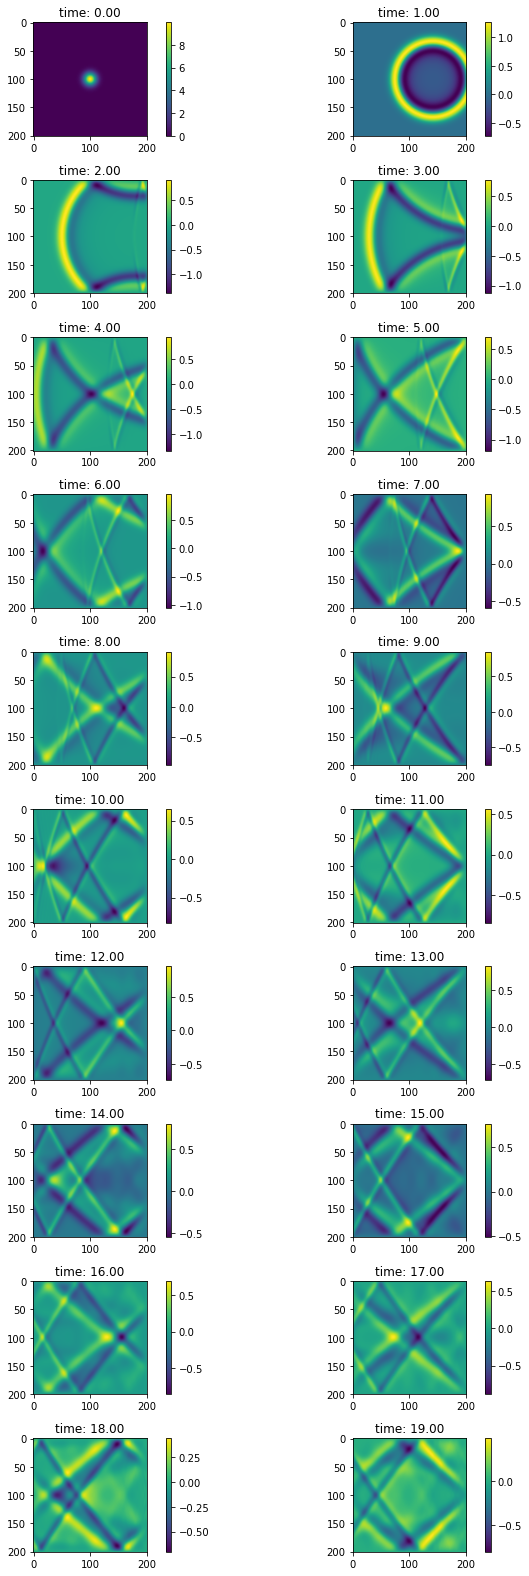

In [69]:
import time
t0 = time.time()

plt.clf
fig2 = plt.figure(figsize=(10,22))

nx=201
ny=nx

t0 = time.time()

out, times = dumptimeintegrate(x,y,nx,ny,dx,dy,order,u0,v0,H,g,20)
plottimes = np.arange(20)
idxs = np.array([np.argmin(np.abs(times - t)) for t in plottimes])

fig2 = plt.figure(figsize=(10,22))

for idx, t in zip(idxs, plottimes):
    ax2 = fig2.add_subplot(10,2,t+1)
    im1= ax2.imshow(out[idx][0])
    plt.title("time: %.2f" % t)
    plt.colorbar(im1)

fig2.tight_layout()
print(time.time() - t0)
plt.savefig("output.jpg")

In [66]:
order

6

32.14391088485718


<Figure size 720x1584 with 0 Axes>

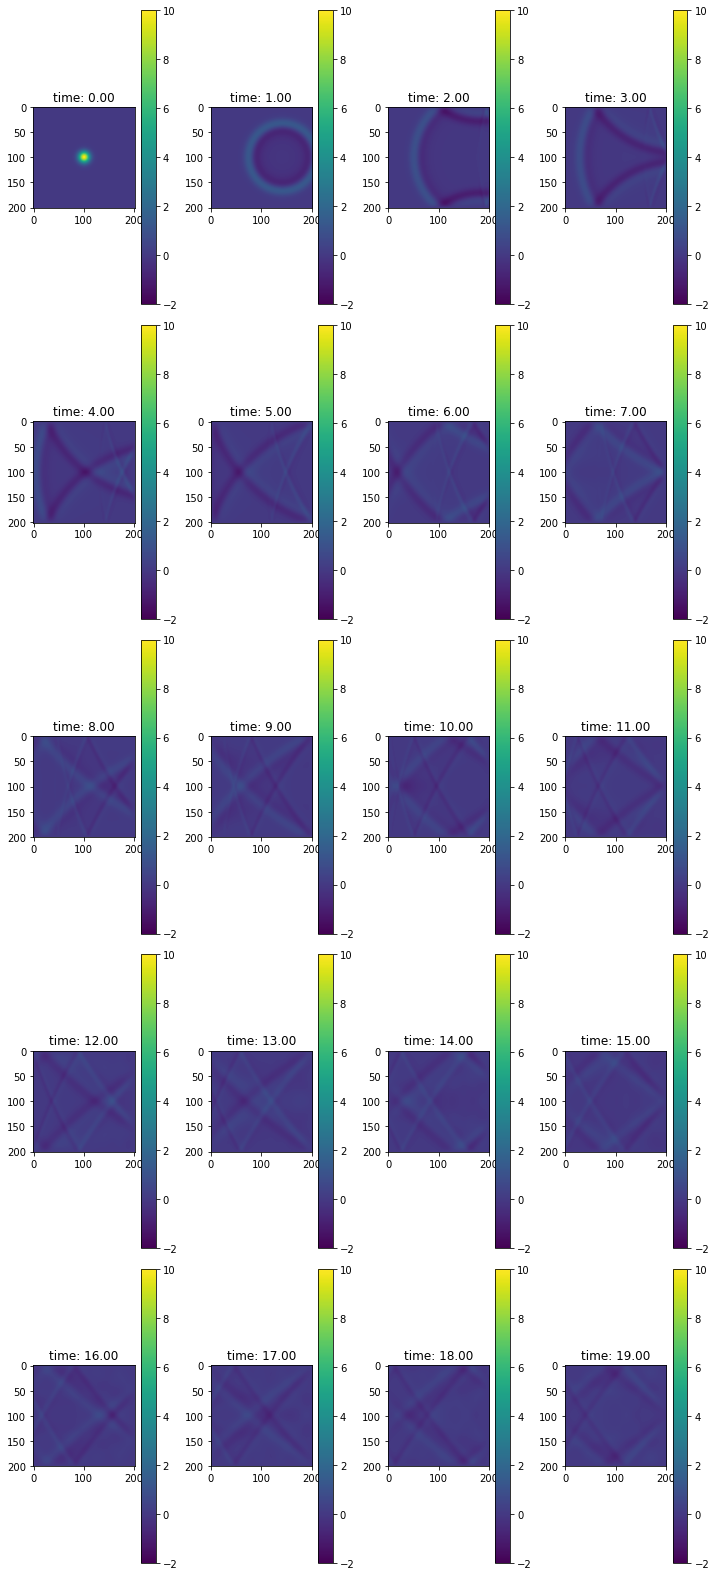

In [68]:
import time
t0 = time.time()

plt.clf
fig2 = plt.figure(figsize=(10,22))

nx=201
ny=nx

t0 = time.time()

out, times = dumptimeintegrate(x,y,nx,ny,dx,dy,order,u0,v0,H,g,20)
plottimes = np.arange(20)
idxs = np.array([np.argmin(np.abs(times - t)) for t in plottimes])

fig2 = plt.figure(figsize=(10,22))

for idx, t in zip(idxs, plottimes):
    ax2 = fig2.add_subplot(5,4,t+1)
    im1= ax2.imshow(out[idx][0], vmin=-2, vmax=10)
    plt.title("time: %.2f" % t)
    plt.colorbar(im1)

fig2.tight_layout()
print(time.time() - t0)
plt.savefig("output.jpg")

In [55]:
ns= np.array([51,101,151,201])  
order = 6
EN= [0] 
for n in ns:
    nx=n;ny=n 
    tend=10
    n=0
    t=0
    X = np.linspace(0,lx,nx)
    dx= X[1]-X[0] 
    Y = np.linspace(0,ly,ny)
    dy= Y[1]-Y[0]
    x,y = np.meshgrid(X,Y)
    stepS= np.sqrt(dx**2+dy**2) 
    dt= cfl*stepS/(u0+math.sqrt(g*H))
    um = uM(x,y,0)
    vm = vM(x,y,0)
    hm = hM(x,y,0)
    A = np.linalg.norm(um)
    Es= [0]
    u= um; h=hm ; v=vm 
    for t in drange(0, tend, dt):
        n = n+1

        #forward Euler
        if method == "Euler":
           unew = u + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[0]
           vnew = v +  dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[1]
           hnew= h + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)[2]


           h = hnew 
           u = unew 
           v = vnew 
        if method == "RK4": 
            K1  = rateMMS(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t)
            K1u = K1[0]
            K1v = K1[1]
            K1h = K1[2]

            K2  = rateMMS(u+dt/2*K1u,v+dt/2*K1v,h+dt/2*K1h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K2u = K2[0]
            K2v = K2[1]
            K2h = K2[2]

            K3  = rateMMS(u+dt/2*K2u,v+dt/2*K2v,h+dt/2*K2h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+0.5*dt)
            K3u = K3[0]
            K3v = K3[1] 
            K3h = K3[2] 

            K4  = rateMMS(u+dt*K3u,v+dt*K3v,h+dt*K3h,nx,ny,dx,dy,order,u0,v0,H,g,x,y,t+dt)
            K4u = K4[0]
            K4v = K4[1]
            K4h = K4[2]

            # corrector
            hnew = h + dt/6*(K1h + 2*K2h + 2*K3h + K4h)
            unew = u + dt/6*(K1u + 2*K2u + 2*K3u + K4u)
            vnew = v + dt/6*(K1v + 2*K2v + 2*K3v + K4v)
            h =hnew
            u = unew
            v = vnew 
            Es.append(np.linalg.norm(u-uM(x,y,t))/ np.linalg.norm(uM(x,y,t)))
    EN.append(max(Es))

9.999151210600647


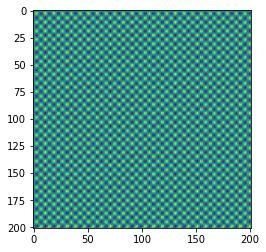

[0, 10625.800337456838, 1326.532333094662, 309.2280960585006, 124.20164437587829]


0.2610430674684068

In [56]:
fig2= plt.figure()
print(t)
im2 = plt.imshow(u, animated=True)
plt.ion()
plt.show()
print(EN)
np.linalg.norm(u-uM(x,y,t))/np.linalg.norm(uM(x,y,t))

[0, 10625.800337456838, 1326.532333094662, 309.2280960585006, 124.20164437587829]


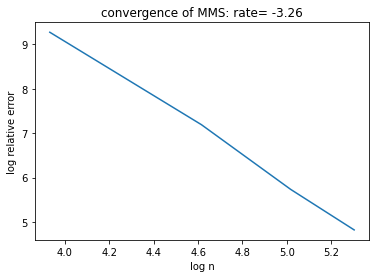

In [57]:
plt.plot(np.log(ns),np.log(EN[1:]))
L=np.polyfit(np.log(ns),np.log(EN[1:]),1)
plt.title("convergence of MMS: rate= %.2f" % L[0])
plt.ylabel('log relative error')
plt.xlabel('log n')
print(EN)

In [62]:
print(L)

[-3.26152598 22.1385729 ]


In [ ]:
#138.3494572893
help(np.polyfit)